# Лабораторная работа 2

## Линейная регрессия

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ &mdash; столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_n$ &mdash; столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_n$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением &mdash; то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_n$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).

На лекциях было показано, что проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$ записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty,$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N &mdash; количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов, в $n$ различных моментов времени &mdash; это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ &mdash; это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обобщающая способность. Обучение и тест 

После того, как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них &mdash; о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2$$

В целом хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям. Например, если мы приближаем функцию одной переменной по значениям в $n$ точках, то наилучшей с точки зрения этой ошибки моделью будет многочлен $(n-1)$-й степени, для которого эта ошибка будет равна нулю.  Тем не менее, вряд ли истинная зависимость имеет вид многочлена большой степени. Более того, значения вам скорее всего даны с погрешностью, то есть вы подогнали вашу модель под свои зашумлённые данные, но на любых других данных (то есть в других точках) точность, скорее всего, окажется совсем не такой хорошей. Этот эффект называют **переобучением**; говорят также, что **обобщающая способность** модели оказалась скверной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Задание 1. Метод наименьших квадратов (4 балла)

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором &mdash; тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом &mdash; $n$ точек (значения аргумента $x$), во втором &mdash; значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача &mdash; по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [0]:
import numpy as np
data_train = np.loadtxt('train.txt', delimiter=',')
data_test = np.loadtxt('test.txt', delimiter=',')

Разделим значения $x$ и $y$

In [0]:
X_train = data_train[:,0]
y_train = data_train[:,1]

X_train_col = np.array([data_train[:,0]]).T
y_train_col = np.array([data_train[:,0]]).T

# Сделайте то же для тестовой выборки
X_test = data_test[:,0]
y_test = data_test[:,1]

Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``).

In [3]:
n_d = len(X_train)
E_col_d = np.array([np.ones(n_d)]).T
X_line = np.concatenate((X_train_col, E_col_d), axis=1)
a_line = np.linalg.inv(X_line.T @ X_line) @ X_line.T @ y_train
print('k =', a_line[0])
print('b =', a_line[1])

k = 2.279134498051949
b = 4.433230905064934


Нарисуйте на плоскости точки $(x_i, y_i)$ и полученную линейную функцию. Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию. Найдите этот многочлен и нарисуйте его график.

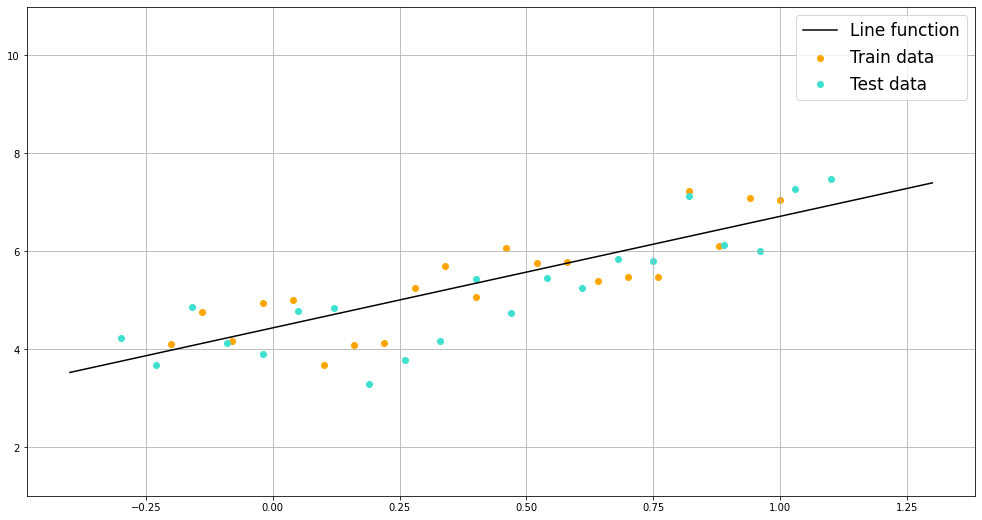

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(17, 9))

line_func_x = np.linspace(-0.4, 1.3) 
line_func_y = a_line[0] * line_func_x + a_line[1]
plt.plot(line_func_x, line_func_y, color='black', label = 'Line function')

plt.scatter(X_train, y_train, color='orange', label='Train data')
plt.scatter(X_test, y_test, color='turquoise', label='Test data')

plt.ylim(1, 11)
plt.legend(prop={'size': 17})
plt.grid(True)
plt.show()

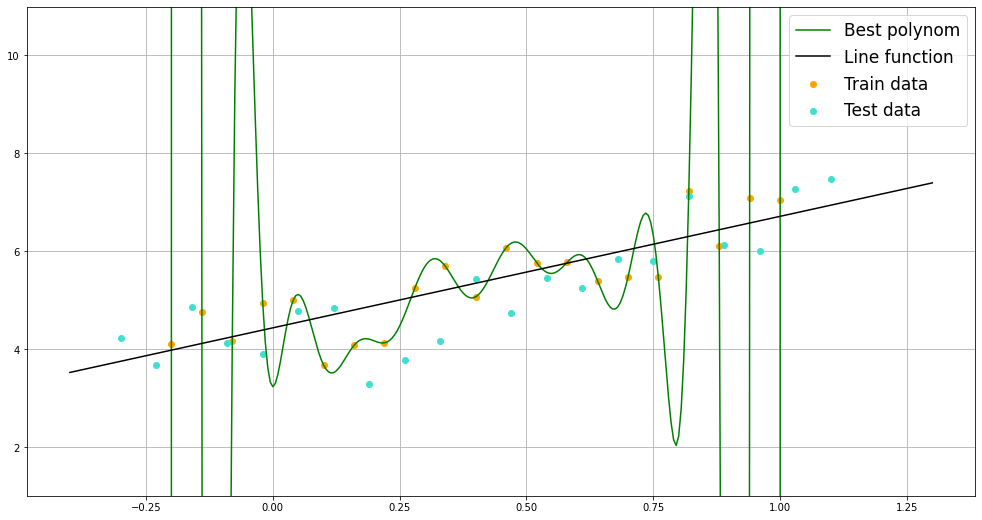

In [5]:
plt.figure(figsize=(17, 9))
#Лучшим приближением является многочлен Лагранжа
#То есть многочлен степени n - 1 (где n - количество точек)
k = n_d - 1
X_best = E_col_d
for i in range(1, n_d):
    tmp = np.array([X_train ** i]).T
    X_best = np.concatenate((tmp, X_best), axis=1)

a_best = np.linalg.solve(X_best, np.array([y_train]).T)
#a_best = np.linalg.inv(X_best.T @ X_best) @ X_best.T @ y_train
#используем это поэтому что формула из начала файла дает некотороую погрешность

points_range = np.arange(-0.4, 1.3, 0.005)

best_pol = []
for x in points_range:
    tmp = 0
    for i in range(n_d):
        tmp += a_best[i] * (x ** (k - i)) 
    best_pol.append(tmp)

plt.plot(points_range, best_pol, color='green', label='Best polynom')

line_func_x = np.linspace(-0.4, 1.3) 
line_func_y = a_line[0] * line_func_x + a_line[1]
plt.plot(line_func_x, line_func_y, color = 'black', label = 'Line function')

plt.scatter(X_train, y_train, color='orange', label='Train data')
plt.scatter(X_test, y_test, color='turquoise', label='Test data')

plt.ylim(1, 11)
plt.legend(prop={'size': 17})
plt.grid(True)
plt.show()

Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором - по парам из тестовых данных).

Для $k = 1,2,3,4,6$ напечатайте коэффициенты полученных многочленов и нарисуйте их графики на одном чертеже вместе с точками $(x_i, y_i)$ (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

In [6]:
for k in range(1, 11):
    print('Degree', k)

    X_pow_train = E_col_d
    for i in range(1, k + 1):
        tmp = np.array([X_train ** i]).T
        X_pow_train = np.concatenate((tmp, X_pow_train), axis=1)

    a_pow = np.linalg.inv(X_pow_train.T @ X_pow_train) @ X_pow_train.T @ y_train
    fk_x_train = X_pow_train @ a_pow

    sq_train_err = 0
    for i in range(n_d):
        el_sum = (fk_x_train[i] - y_train[i]) ** 2
        sq_train_err = sq_train_err + el_sum
    
    sq_train_err = sq_train_err / n_d
    print('Train data error:', sq_train_err)
   
    X_pow_test = E_col_d
    for i in range(1, k + 1):
        tmp = np.array([X_test ** i]).T
        X_pow_test = np.concatenate((tmp, X_pow_test), axis=1)

    fk_x_test = X_pow_test @ a_pow
    
    sq_test_err = 0
    for i in range(n_d):
        el_sum = (fk_x_test[i] - y_test[i]) ** 2
        sq_test_err = sq_test_err + el_sum
    
    sq_test_err = sq_test_err / n_d
    print('Test data error:', sq_test_err)


Degree 1
Train data error: 0.2968966332625196
Test data error: 0.4351202004048878
Degree 2
Train data error: 0.26969891587669137
Test data error: 0.35647628878312154
Degree 3
Train data error: 0.269497187147961
Test data error: 0.3553464571518492
Degree 4
Train data error: 0.26106653305792754
Test data error: 0.441727018927249
Degree 5
Train data error: 0.24998504648317507
Test data error: 0.5579732021587916
Degree 6
Train data error: 0.188293489883705
Test data error: 2.581692932668173
Degree 7
Train data error: 0.18539621153294478
Test data error: 2.5157829021037834
Degree 8
Train data error: 0.1590555657909125
Test data error: 4.357288851989788
Degree 9
Train data error: 0.15847184274993706
Test data error: 4.776328568215142
Degree 10
Train data error: 0.1531661108647309
Test data error: 14.632332786887664


Коэфиценты выводятся в порядке убывания степени х:
degree 1:
2.279134498 4.433230905 
degree 2:
1.401628512 1.157831688 4.472476503 
degree 3:
-0.381768604 1.859750837 1.065016105 4.460736355 
degree 4:
7.918474697 -13.05132812 6.794091784 1.171802393 4.34116612 
degree 6:
-229.970133397 581.453298187 -481.510132838 121.257097118 16.002903989 -4.597179325 4.383795011 


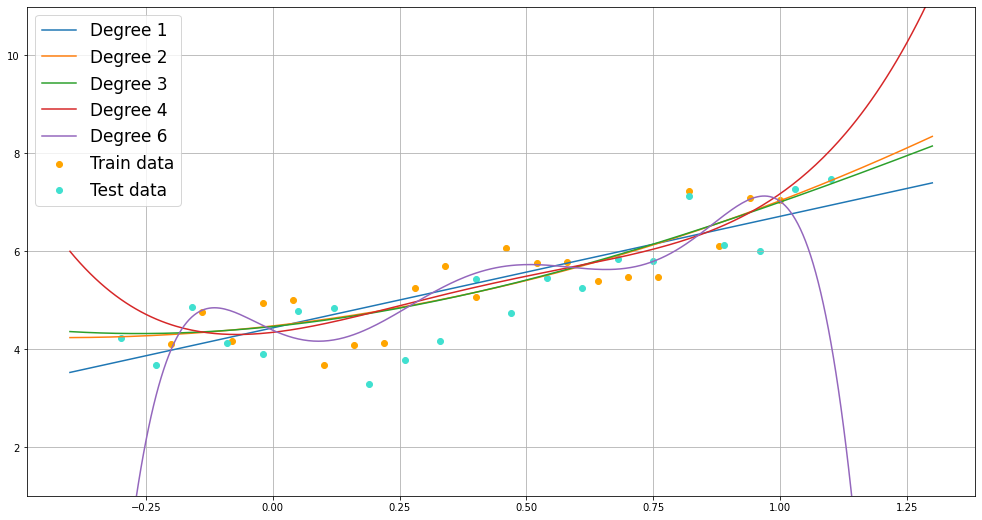

In [7]:
print('Коэфиценты выводятся в порядке убывания степени х:')
plt.figure(figsize=(17, 9))
for k in range(1, 7):
    if (k == 5):
      continue
    X_deg = E_col_d
    for i in range(1, k + 1):
        tmp = np.array([X_train ** i]).T
        X_deg = np.concatenate((tmp, X_deg), axis=1)
     
    a_deg = np.linalg.inv(X_deg.T @ X_deg) @ X_deg.T @ y_train
    
    Mat_deg = []
    points_range = np.arange(-0.4, 1.3, 0.005)
    for p in points_range:
        fk_x_deg = 0
        for i in range(k + 1):
            fk_x_deg += p ** (k - i) * a_deg[i]
        Mat_deg.append(fk_x_deg)
    
    print('degree '+str(k)+':')
    for i in range(k + 1):
        print(round(a_deg[i], 9), sep=' ', end = ' ')
    print()   
    plt.plot(points_range, Mat_deg, label='Degree '+str(k))

plt.scatter(X_train, y_train, color='orange', label='Train data')
plt.scatter(X_test, y_test, color='turquoise', label='Test data')

plt.ylim(1, 11)
plt.legend(prop={'size': 17})
plt.grid(True)
plt.show()

Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$?

Для обучающей выборки ошибка будет уменьшаться с ростом степени многочлена, это происходит, потому что функция всё сильнее подстраивается под данные обучения. Тестовые данные имеют некоторые отклонение от точек, лежащих в обучающей выборке. Сначала функция приближается к обшей искомой закономерности, но начиная с некоторой степени, чем сильнее наша функция подстраивается под данные обучения, тем сильнее увеличивается отклонение обучающих данных от тестовых, и тем сильнее функция отклоняется от тестовых данных. Это называется эффектом переобучения. Как только функция выходит за границы обучающей выборки, графики перестают коррелировать с действительностью и вообще уходят в бесконечность. Это происходит уже при 6й степени многочлена, а многочлен Лагранжа для всех обучающих точек и вовсе попадает только в данные обучения, абсолютно игнорируя остальные точки последовательностей.


### Задание 2. Линейная регрессия (4 балла)

Скачайте файлы ``flats_moscow_mod.txt`` и ``flats_moscow_description.txt``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков. Вашей задачей будет построить с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами.

С помощью известных вам формул найдите регрессионные коэффициенты. Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

Оцените качество приближения, вычислив среднеквадратическую ошибку.

In [8]:
data_flats = np.loadtxt('flats_moscow_mod.txt', delimiter='\t', skiprows=1)

price = data_flats[:,0]
flats_ch = data_flats[:,1:]

n_f = len(data_flats)
E_col_f = np.array([np.ones(n_f)]).T
X = np.concatenate((data_flats[:,1:], E_col_f), axis=1)

a = np.linalg.inv(X.T @ X) @ X.T @ price

print('Полученные линейные коэффициенты:')
print('Общая площадь', a[0])
print('Жилая площадь', a[1])
print('Площадь кухни', a[2])
print('Расстояние до центра', a[3])
print('Расстояние до метро', a[4])

Полученные линейные коэффициенты:
Общая площадь 1.4870528861257988
Жилая площадь 1.6562890012270088
Площадь кухни 1.8192049792748626
Расстояние до центра -3.3271540562741277
Расстояние до метро -1.315688603701584


In [9]:
sq_err = 0
for i in range(n_f):
    sum_Xai = 0
    for j in range(6):
        sum_Xai += a[j] * X[i][j]
    sq_err += (sum_Xai  - price[i]) ** 2

sq_err = sq_err / n_f

print('Среднеквадратическая ошибка:', sq_err)

Среднеквадратическая ошибка: 924.0090032083955


Какой смысл имеют их знаки? 

Положительные коэффициенты характеризуют величины, повышающие стоимость квартиры, а отрицательные - понижающие. Так площадь квартиры повышает стоимость, а её удаленность от метро и центра - понижают.

Согласуются ли они с вашими представлениями о жизни?

В принципе да. Квартиры в центре дороже, чем на окраине. И чем больше квартира, тем она дороже. Но не очень понятно почему площадь кухни важнее жилой площади. Возможно соотношение ценностей площадей различного типа всё же более индивидуально для разных людей. 

### Усложнение модели

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению. 

**Сравнение моделей**

Когда вы построите новую модель, вам захочется понять, лучше она или хуже, чем изначальная. Проверять это на той же выборке, на которой вы обучались, бессмысленно и даже вредно (вспомните пример с многочленами: как прекрасно падала ошибка на обучающей выборке с ростом степени!). Поэтому вам нужно будет разделить выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split`.

In [10]:
import sklearn.model_selection
err_com = 0
num_try = 7000
for e in range(num_try):
    X_train_com, X_test_com, y_train_com, y_test_com = sklearn.model_selection.train_test_split(flats_ch, price, test_size = 0.17, random_state = 42)

    n_com = len(X_train_com)

    X_com  = np.concatenate((np.array([np.ones(n_com)]).T, X_train_com), axis=1)
    X_com  = np.concatenate((X_com , X_train_com ** 0.5), axis=1)
    X_com  = np.concatenate((X_com , X_train_com ** 1.5), axis=1)
    X_com  = np.concatenate((X_com , X_train_com ** 2), axis=1)
    #X_com  = np.concatenate((X_com , X_train_com ** 2.5), axis=1)
    #X_com  = np.concatenate((X_com , X_train_com ** 3), axis=1)
    X_com  = np.concatenate((X_com , np.log(X_train_com)), axis=1)
    # попарные произведения не помогли в увеличении точности

    X_test_new = np.concatenate((np.array([np.ones(len(X_test_com))]).T, X_test_com), axis=1)
    X_test_new = np.concatenate((X_test_new, X_test_com ** 0.5), axis=1)
    X_test_new = np.concatenate((X_test_new, X_test_com ** 1.5), axis=1)
    X_test_new = np.concatenate((X_test_new, X_test_com ** 2), axis=1)
    #X_test_new = np.concatenate((X_test_new, X_test_com ** 2.5), axis=1)
    #X_test_new = np.concatenate((X_test_new, X_test_com ** 3), axis=1)
    X_test_new = np.concatenate((X_test_new, np.log(X_test_com)), axis=1)

    a_com = (np.linalg.inv(X_com.T @ X_com) @ X_com.T) @ y_train_com

    res_com = X_test_new @ a_com
    for i in range(len(res_com)):
        err_com += (res_com[i] - y_test_com[i]) ** 2 / len(X_test_com)

print(err_com / num_try)

736.5791213357755


### Задание 3. Регуляризация (2 балла)

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться (то есть будет, но не с помощью приведённой выше формулы). В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы &mdash; необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них &mdash; регуляризация. Сейчас мы рассмотрим одну из её разновидностей &mdash; **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda$ &mdash; некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. Параметр $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала. 

Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации многочленом шестой степени довольно высокая. Убедитесь, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регрессии. Для этого $\lambda$ сравните $\det(X^TX)$ и $\det(X^TX + \lambda E)$.

In [11]:
#Циклом перебрал лямбду с шагом 0.001
#Цикл содержит в себе часть основного кода и выглядит следующим образом:
"""
mem_err = 10000
mem_Lambd = 0
for i in range (1, 3001, 1):
    Lambd =  i * 0.001
    
    k = 6
    X_imp_train = E_col_d
    for i in range(1, k + 1):
        tmp = np.array([X_train ** i]).T
        X_imp_train = np.concatenate((tmp, X_imp_train), axis=1)

    E_k = np.eye(k + 1)
    a_new = np.linalg.inv(X_imp_train.T @ X_imp_train + Lambd * E_k) @ X_imp_train.T @ y_train

    X_imp_test = E_col_d
    for i in range(1, k + 1):
        tmp = np.array([X_test ** i]).T
        X_imp_test = np.concatenate((tmp, X_imp_test), axis=1)

    fk_x_new = X_imp_test  @ a_new
        
    new_err = 0
    for i in range(n_d):
        new_sum = (fk_x_new[i] - y_test[i]) ** 2
        new_err = new_err + new_sum
    new_err = new_err / n_d

    if (new_err < mem_err):
          mem_err = new_err
          mem_Lambd = Lambd
print(mem_Lambd)
print(mem_err)
"""
#Получил, что новая ошибка минимальна при Lambd = 1.158
Lambd = 1.158

k = 6
X_imp_train = E_col_d
for i in range(1, k + 1):
    tmp = np.array([X_train ** i]).T
    X_imp_train = np.concatenate((tmp, X_imp_train), axis=1)

E_k = np.eye(k + 1)
a_old = np.linalg.inv(X_imp_train.T @ X_imp_train) @ X_imp_train.T @ y_train
a_new = np.linalg.inv(X_imp_train.T @ X_imp_train + Lambd * E_k) @ X_imp_train.T @ y_train

X_imp_test = E_col_d
for i in range(1, k + 1):
    tmp = np.array([X_test ** i]).T
    X_imp_test = np.concatenate((tmp, X_imp_test), axis=1)

fk_x_old = X_imp_test  @ a_old
fk_x_new = X_imp_test  @ a_new

old_err = 0
for i in range(n_d):
    old_sum = (fk_x_old[i] - y_test[i]) ** 2
    old_err = old_err + old_sum
old_err = old_err / n_d

new_err = 0
for i in range(n_d):
    new_sum = (fk_x_new[i] - y_test[i]) ** 2
    new_err = new_err + new_sum
new_err = new_err / n_d

#Ответы
print('Lambda:', Lambd)
print('Old error:', old_err)
print('New error:', new_err)
print('Old determinant:', np.linalg.det(X_imp_train.T @ X_imp_train))
print('New determinant: ', np.linalg.det(X_imp_train.T @ X_imp_train + Lambd * E_k))

Lambda: 1.158
Old error: 2.581692932668173
New error: 0.30734409331865387
Old determinant: 9.08286483934784e-12
New determinant:  1012.5548470328209


В модели без регресии мы получали ошибку 2.5816930, а теперь мы снизили её до 0.3073441

Определитель матрицы без регрессии показывает, что она близка к вырожденной, что ведёт к переобучению. Применив регресию, мы изменили матрицу и функция лучше обучется по новой не вырожденной матрице (убедитьс в её не вырожденности можно посмотрев на определитель)

Нарисуйте на одном чертеже графики многочленов шестой степени, приближающих неизвестную функцию, для модели с регуляризацией и без. Чем первый из них выгодно отличается от второго?

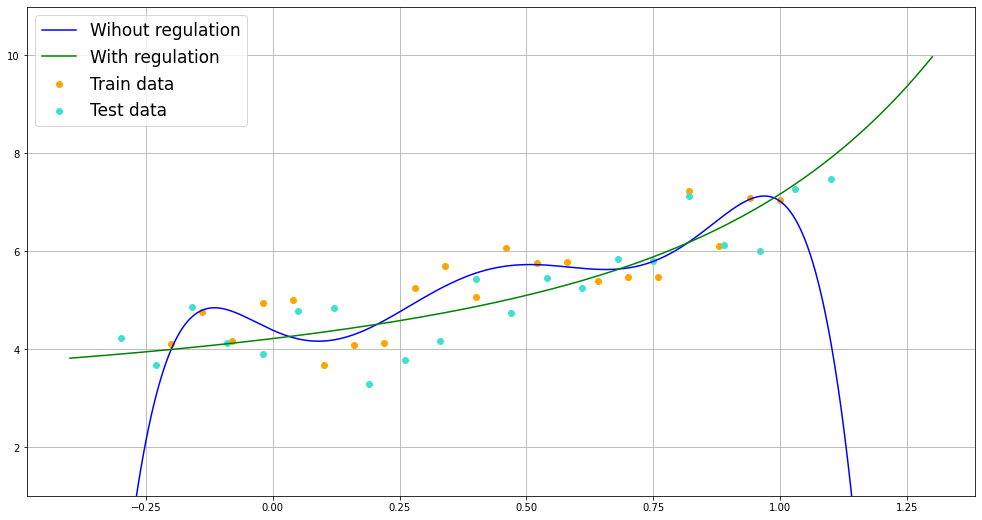

In [12]:
plt.figure(figsize=(17, 9))
k = 6
points_range = np.arange(-0.4, 1.3, 0.005)

Mat_old = []
for p in points_range:
    fk_x_old = 0
    for i in range(k + 1):
        fk_x_old  += p ** (k - i) * a_old[i]
    Mat_old.append(fk_x_old)

Mat_new = []
for p in points_range:
    fk_x_new = 0
    for i in range(k + 1):
        fk_x_new += p ** (k - i) * a_new[i]
    Mat_new.append(fk_x_new)

plt.plot(points_range, Mat_old, color='blue', label='Wihout regulation')
plt.plot(points_range, Mat_new, color='green', label='With regulation')

plt.scatter(X_train, y_train, color='orange', label='Train data')
plt.scatter(X_test, y_test, color='turquoise', label='Test data')

plt.ylim(1, 11)
plt.legend(prop={'size': 17})
plt.grid(True)
plt.show()


Чем модель с регуляризацией выгодно отличается от модели без регуляризации?
Полином с регуляризацией не уходит в бесконечность, как только выходит за границы обучающих данных.
- Многочлен с регуляризацией не уходит в бесконечность, как только выходит за границы обучающих данных, а значит он может предсказывать значения точек в бОльшем диапазоне. 
- Функция многочлеа с регуляризацией имеет более простой, плавный и понятный вид.
- При применении модели с регуляризацией, можно достичь меньшей ошибки на тестовых данных, чем при применении модели без неё.

Попробуйте доказать, что вектор $a = (X^TX + \lambda E)^{-1}X^Ty$ является решением задачи

$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min$$

Интуитивно это можно понимать так: мы ищем компромисс между минимизацией длины разности $|Xa - y|$ (то есть точностью решения задачи регрессии) и тем, чтобы компоненты вектора $a$ не становились слишком большими по модулю.

---

**Ваше решение напишите прямо здесь**

$$f(a) = |Xa - y|^2 + \lambda|a|^2 \rightarrow\min$$
$$\frac{df}{da} = \frac{d}{da}(a^TX^TXa - 2y^TXa + y^Ty+\lambda a^Ta) = $$
$$-X^Ty + X^TXa + \lambda a = 0$$
$$(X^TX + \lambda E) a = X^Ty$$
$$a = (X^TX + \lambda E)^{-1}X^Ty$$

### Задание 4. Онлайн-обучение линейной регрессии (3 балла)

Раньше мы работали в ситуации, когда объекты $x_i$ и значения $y_i$ даны с самого начала и всегда доступны. Допустим теперь, что пары $(x_i, y_i)$ поступают к нам по одной и мы не можем себе позволить хранить их все в памяти (это может быть актуально, например, если вы пытаетесь обучить модель на устройстве со сравнительно небольшим количеством оперативной памяти: скажем, на мобильном телефоне или на бортовом компьютере спутника связи). В этом случае нам нужно уметь решать следующую задачу:

**Известно:** решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$;

**На вход поступает:** новая пара $(x_{t+1}, y_{t+1})$;

**Требуется:** быстро (за время, не зависящее от $t$) отыскать решение задачи регрессии для расширенного датасета $(x_1, y_1),\ldots,(x_t,y_t),(x_{t+1}, y_{t+1})$.

Эту задачу мы будем решать в два этапа.

**Этап 1.** Введём обозначения $X_{(t)} = (x_1\ldots x_t)$ и $y_{(t)} = (y_1,\ldots,y_t)^T$. Тогда, как мы хорошо помним, решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$ имеет вид $\hat{a}_{(t)} = \left(X^T_{(t)}X_{(t)}\right)^{-1}X^T_{(t)}y_{(t)}$. Размеры матриц $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$ не зависят от $t$, поэтому их мы, пожалуй, можем себе позволить хранить в памяти.

И вот ваше первое задание в этом разделе: придумайте алгоритм, принимающий на вход матрицы $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$, а также пару $(x_{t+1}, y_{t+1})$ и вычисляющий матрицы $X^T_{(t+1)}X_{(t+1)}$ и $X^T_{(t+1)}y_{(t+1)}$. Сложность вашего алгоритма не должна зависеть от $t$!

--

**Описание вашего алгоритма напишите прямо здесь**

Рассмотрим матрицу $X_t^T X_t $ (Обозначим её в коде за XX)<br>
$(X_t^T X_t)_{ij} = \sum_{k=1}^{t} x_{ki} * x_{kj} $<br>

$(X_{(t+1)}^T X_{(t+1)})_{ij} = \sum_{k=1}^{t+1} x_{ki} * x_{kj}$ <br>

Получается, что из матрицы $X_t^T X_t $ в матрицу $X_{(t+1)}^T X_{(t+1)}$ можно перейти следующим образом. <br>
$(X_{(t+1)}^T X_{(t+1)})_{ij} = (X_t^T X_t)_{ij}  + x_{(t+1)i} * x_{(t+1)j}$ <br>
 
Размер матрицы $X_t^T X_t$ не зависит от t. На каждом шаге мы совершаем одни и те же действия, сложность которых не зависит от t. Получим, что вся сложность перехода от одной такой матрицы к другой не зависит от t. <br>

Рассмотрим матрицу $X_t^T y_t$ (Обозначим её в коде за Xy)<br>
$(X_t^T y_t)_{i} = \sum_{k=1}^{t} x_{ki} * y_k$ <br>

$(X_{(t+1)}^T y_{(t+1)})_{i} = \sum_{k=1}^{t+1} x_{ki} * y_{k}$ <br>

Получается, что из матрицы $X_t^T y_t$ в матрицу $X_{(t+1)}^T y_{(t+1)}$ можно перейти следующим образом: <br>
$(X_{(t+1)}^T y_{(t+1)})_{i}  = (X_t^T y_t)_{i} + x_{(t+1)i} * y_{(t+1)}$ <br>

Размер матрицы $X_t^T y_t$ не зависит от t. На каждом шаге мы совершаем одни и те же действия, сложность которых не зависит от t. Получим, что вся сложность перехода от одной такой матрицы к другой не зависит от t. <br>

Значит наше решение эффективно, ведь на каждую новую пару данных мы тратим константу операций.

**Этап 2.** Теперь настало время написать немного кода и порисовать красивые картинки. Вам нужно будет реализовать симуляцию онлайн-обучения регрессии для задачи приближения функции (в данном случае $f_{true}(x) = 2x\sin(x) + x^2 - 1$; все значения искажены небольшим нормальным шумом) многочленом степени не выше 5.

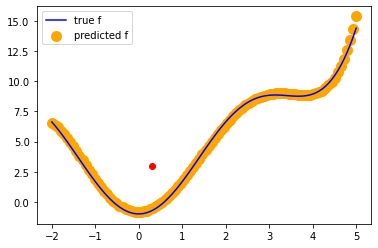

In [13]:
from IPython.display import clear_output

#f_true = lambda x: 2*x*np.sin(5*x) + x**2 - 1 # this is the true function
#исправил функцию, нас же спросили про sin(x), а не sin(5x)
f_true = lambda x: 2*x*np.sin(x) + x**2 - 1

# We need this to make the plot of f_true:
x_grid = np.linspace(-2,5,100) # 100 linearly spaced numbers
x_grid_enl = np.hstack((x_grid.reshape((100,1))**j for j in range(6)))
y_grid = f_true(x_grid)

XX = np.dot(x_grid_enl.T, x_grid_enl)
Xy = np.dot(x_grid_enl.T, y_grid)

for i in range(200):

    x_new = np.random.uniform(-2, 5)
    y_new = f_true(x_new) + 2*np.random.randn()
    
    # your code goes here
    polynom = [x_new**j for j in range(6)]
    for j in range(6):
        for k in range(6):
            XX[j][k] += polynom[j] * polynom[k]
        Xy[j] += polynom[j] * y_new
    
    a_coef = np.linalg.inv(XX) @ Xy
    # the rest of code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.plot(x_grid,y_grid, color='blue', label='true f')
        plt.scatter(x_new, y_new, color='red')
        
        # your code goes here
        y_pred = []
        for x in x_grid:
            tmp = 0
            for k in range(6):
                tmp += a_coef[k] * (x ** k)
            y_pred.append(tmp)
        
        plt.scatter(x_grid, y_pred, color='orange', linewidth=5, label='predicted f')
        
        plt.legend(loc='upper left')
        plt.show()

### Добавление. QR-разложение

**QR-разложением** матрицы $A$ (не обязательно квадратной) мы будем называть её представление в виде $A = QR$, где $Q$ &mdash; матрица с ортонормированными столбцами, а $R$ &mdash; верхнетреугольная матрица.

Смысл QR-разложения следующий. Пусть $a_1,\ldots,a_m$ &mdash; столбцы матрицы $A$, $q_1,\ldots,q_t$ &mdash; столбцы матрицы $Q$. Тогда $q_1,\ldots,q_t$ &mdash; это ортонормированный базис в подпространстве, являющемся линейной оболочкой векторов $a_1,\ldots,a_m$, а в матрице $R$ записаны коэффициенты, с помощью которых $a_i$ выражаются через $q_1,\ldots,q_t$.

Находить QR-разложение заданной матрицы можно разными способами. Мы познакомим вас не с самым лучшим из них, но по крайней мере с наиболее простым концептуально. Заметим, что ортогональный базис линейной оболочки можно найти с помощью ортогонализации Грама-Шмидта. При этом коэффициенты из матрицы $R$ получаются в качестве побочного продукта этого процесса:

```python
for j = 1...n:
    q_j = a_j
    for i = 1,...,j-1:
        r_ij = (q_i, a_j)
        q_j = q_j - r_ij * q_i
    r_jj = |q_j|
    if r_jj == 0: # a_j in <a_1,...,a_j-1>
        # What would you do in this case?..
    q_j = q_j / r_jj
```

Для нахождения QR-разложения вы можете использовать библиотечную функцию `scipy.linalg.qr`.

Поскольку лабораторная про линейную регрессию, не так-то просто замять вопрос о том, какое же отношение QR-разложение имеет к задаче регрессии. Упомянем одно из возможных применений.

Допустим, мы нашли QR-разложение матрицы $X$, а именно: $X = QR$. Тогда
$$X^TX = (QR)^T(QR) = R^TQ^TQR = R^TR$$

Поскольку в задаче регрессии матрица $X$ обычного полного ранга (то есть её столбцы линейно независимы), матрица $R$ будет квадратной. Благодаря этому нашу обычную формулу для набора регрессионных коэффициентов $\hat{a}$ можно переписать в следующем виде:

$$\hat{a} = (X^TX)^{-1}X^Ty = (R^TR)^{-1}(QR)^Ty = R^{-1}(R^T)^{-1}R^TQ^Ty = R^{-1}Q^Ty$$

Как видите, формула стала проще. Более того, зачастую обращение матрицы $R$ может быть численно более устойчиво, чем обращение матрицы $X^TX$.